In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import permutation
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# import the dataset
Carseats = pd.read_csv("Carseats.csv")
col_dtype = Carseats.dtypes
Carseats = Carseats.to_numpy()
row, col = Carseats.shape
for (i, dtype) in enumerate(col_dtype):
    if dtype == "object":
        Carseats[:,i] = np.unique(Carseats[:,i], return_inverse = True)[1]
    else:
        Carseats[:,i] = Carseats[:,i].astype(dtype)
X, Y = Carseats[:,range(1,col)], Carseats[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Decision tree implementation
def DecisionTree(X_train, Y_train, X_test, Y_test, max_depth = None, least_node_size = 1):
    regressor = DecisionTreeRegressor(max_depth= max_depth, min_samples_leaf= least_node_size)
    regressor = regressor.fit(X_train, Y_train)
    t_predict = regressor.predict(X_train)
    t_mse = mean_squared_error(t_predict, Y_train)
    test_predict = regressor.predict(X_test)
    test_mse = mean_squared_error(test_predict, Y_test)
    return test_predict, t_mse, test_mse

# Bagging tree implementation
def BaggingTree(X_train, Y_train, X_test, Y_test, max_depth = None, n_estimators = 10):
    regressor = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_depth = max_depth), n_estimators = n_estimators)
    regressor = regressor.fit(X_train, Y_train)
    t_predict = regressor.predict(X_train)
    t_mse = mean_squared_error(t_predict, Y_train)
    test_predict = regressor.predict(X_test)
    test_mse = mean_squared_error(test_predict, Y_test)
    return test_predict, t_mse, test_mse

# Random forest implementation
def Random_Forest(X_train, Y_train, X_test, Y_test, n_estimators = 100, max_features = "auto"):
    regressor = RandomForestRegressor(n_estimators = n_estimators, max_features=max_features)
    regressor = regressor.fit(X_train, Y_train)
    t_predict = regressor.predict(X_train)
    t_mse = mean_squared_error(t_predict, Y_train)
    test_predict = regressor.predict(X_test)
    test_mse = mean_squared_error(test_predict, Y_test)
    return test_predict, t_mse, test_mse

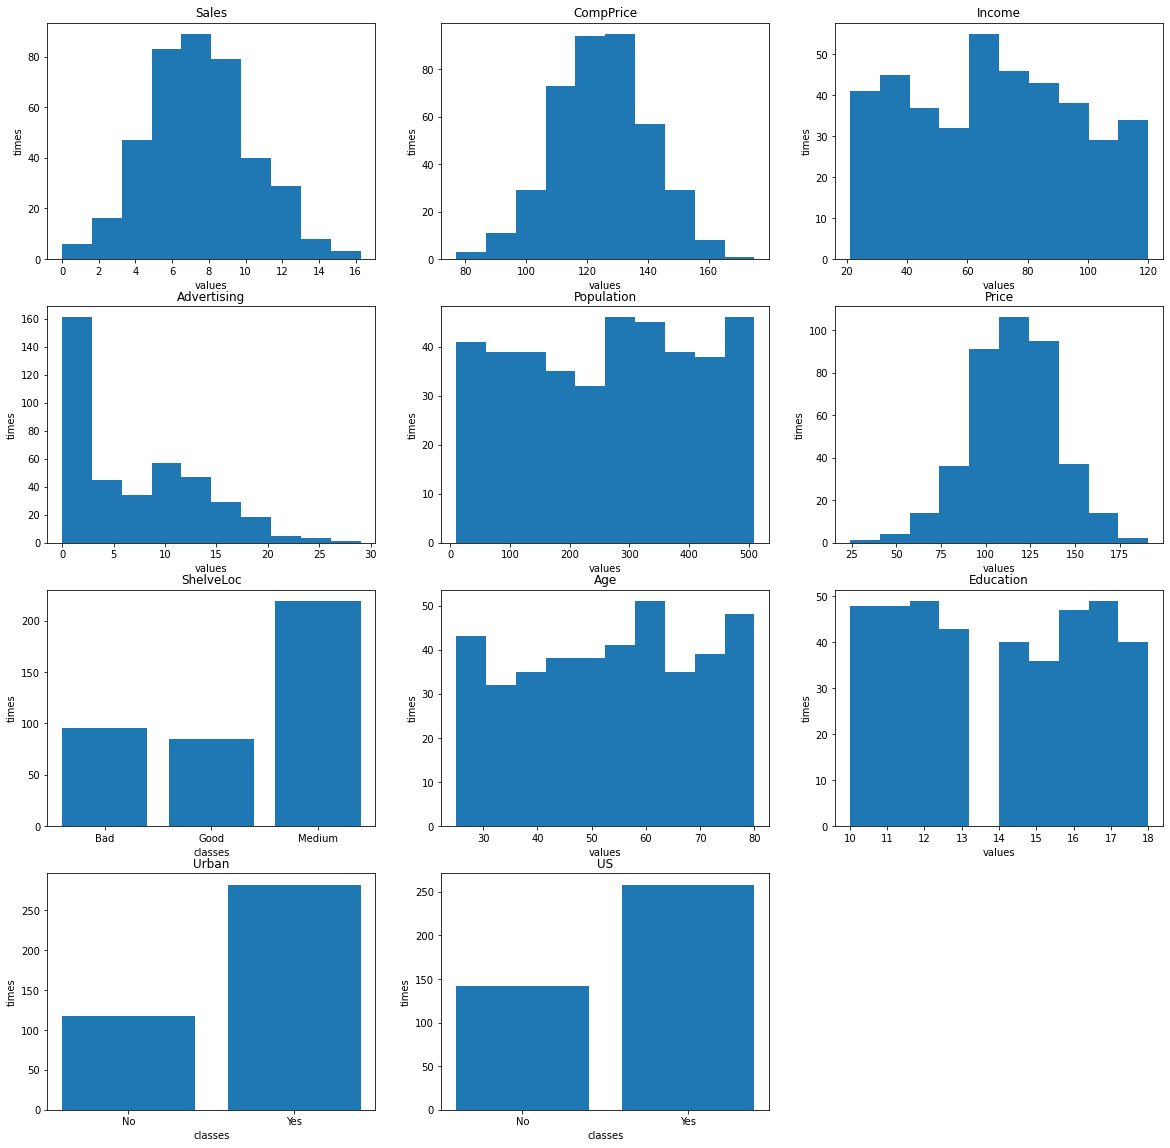

In [3]:
# Data statistics
df = pd.read_csv('Carseats.csv')
df = pd.DataFrame(df)
plt.figure(figsize=(20, 20))
n = len(df.columns)
for i in range(n):
    if (i!=6 and i!=9 and i!=10):
        plt.subplot(4, 3, i+1)
        A = df.iloc[:, i].values
        plt.hist(A)
        plt.xlabel('values')
        plt.ylabel('times')
        plt.title(df.columns[i])
    else:
        plt.subplot(4, 3, i+1)
        A = pd.DataFrame(df.groupby(df.columns[i]).size())
        plt.bar(x=list(A.index), height=list(A.iloc[:, 0].values))
        plt.xlabel('classes')
        plt.ylabel('times')
        plt.title(df.columns[i])
plt.show()

In [5]:
# Decision Tree
def cal_error(depth_range = (3, 10), node_size_range = (1,10)):
    depth_range = np.linspace(*depth_range[:2], int(depth_range[1])-int(depth_range[0]) + 1 if len(depth_range) == 2 else depth_range[-1], dtype = int)
    node_size_range = np.linspace(*node_size_range[:2], int(node_size_range[1])-int(node_size_range[0]) + 1 if len(node_size_range) == 2 else node_size_range[-1], dtype = int)
    train_error = np.zeros((len(depth_range), len(node_size_range)))
    test_error = np.zeros((len(depth_range), len(node_size_range)))
    for i, depth in enumerate(depth_range):
        for j, node_size in enumerate(node_size_range):
            _, train_mse, test_mse = DecisionTree(X_train, Y_train, X_test, Y_test, max_depth = depth, least_node_size = node_size)
            train_error[i, j] = train_mse
            test_error[i, j] = test_mse
    return train_error, test_error

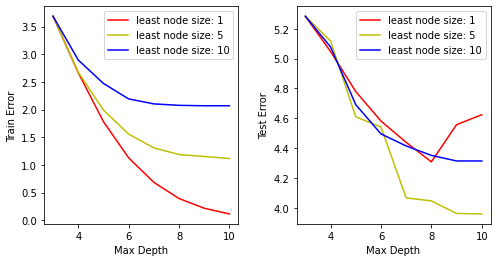

In [13]:
train_error, test_error = cal_error(depth_range = (3,10), node_size_range = (1,15,15))
X = np.linspace(3, 10, 8, dtype = int)
plt.figure(figsize = (8,4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(121)
plt.plot(X, train_error[:,0],'r-', label = "least node size: 1")
plt.plot(X, train_error[:,4],'y-', label = "least node size: 5")
plt.plot(X, train_error[:,9],'b-', label = "least node size: 10")
plt.xlabel("Max Depth")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
plt.plot(X, test_error[:,0],'r-', label = "least node size: 1")
plt.plot(X, test_error[:,4],'y-', label = "least node size: 5")
plt.plot(X, test_error[:,9],'b-', label = "least node size: 10")
plt.xlabel("Max Depth")
plt.ylabel("Test Error")
plt.legend()
plt.show()

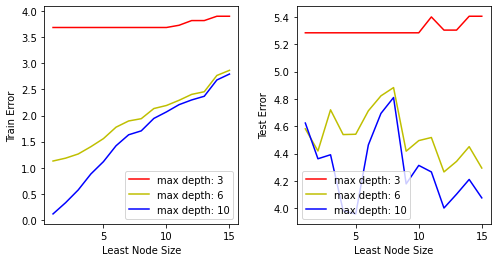

In [18]:
X = np.linspace(1, 15, 15, dtype = int)
plt.figure(figsize = (8,4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(121)
plt.plot(X, train_error[0,:],'r-', label = "max depth: 3")
plt.plot(X, train_error[3,:],'y-', label = "max depth: 6")
plt.plot(X, train_error[7,:],'b-', label = "max depth: 10")
plt.xlabel("Least Node Size")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
plt.plot(X, test_error[0,:],'r-', label = "max depth: 3")
plt.plot(X, test_error[3,:],'y-', label = "max depth: 6")
plt.plot(X, test_error[7,:],'b-', label = "max depth: 10")
plt.xlabel("Least Node Size")
plt.ylabel("Test Error")
plt.legend()
plt.show()

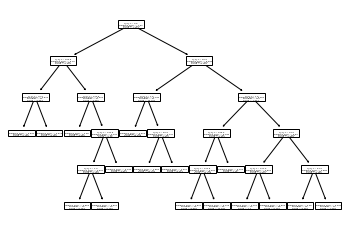

In [21]:
plt.figure()
regressor = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 10)
regressor = regressor.fit(X_train, Y_train)
tree.plot_tree(regressor)
plt.show()


In [23]:
# Bagging Tree
def bag_error(depth_range, tree_num_range):
    depth_range = np.linspace(*depth_range[:2], int(depth_range[1])-int(depth_range[0]) + 1 if len(depth_range) == 2 else int(depth_range[-1]), dtype = int)
    tree_num_range = np.linspace(*tree_num_range[:2], int(tree_num_range[1])-int(tree_num_range[0]) + 1 if len(tree_num_range) == 2 else int(tree_num_range[-1]), dtype = int)
    train_error = np.zeros((len(depth_range), len(tree_num_range)))
    test_error = np.zeros((len(depth_range), len(tree_num_range)))
    for i, depth in enumerate(depth_range):
        for j, tree_num in enumerate(tree_num_range):
            _, train_mse, test_mse = BaggingTree(X_train, Y_train, X_test, Y_test, max_depth = depth, n_estimators = tree_num)
            train_error[i, j] = train_mse
            test_error[i, j] = test_mse
    return train_error, test_error

In [24]:
train_error, test_error = bag_error(tree_num_range = (10,200,20), depth_range = (2, 16, 8))

In [25]:
# Random Forest
def rf_error(tree_num_range, max_feature_range):
    tree_num_range = np.linspace(*tree_num_range[:2], int(tree_num_range[1])-int(tree_num_range[0]) + 1 if len(tree_num_range) == 2 else int(tree_num_range[-1]),  dtype = int)
    max_feature_range = np.linspace(*max_feature_range[:2], int(max_feature_range[1])-int(max_feature_range[0]) + 1 if len(max_feature_range) == 2 else int(max_feature_range[-1]), dtype = int)
    train_error = np.zeros((len(tree_num_range), len(max_feature_range)))
    test_error = np.zeros((len(tree_num_range), len(max_feature_range)))
    for i, tree_num in enumerate(tree_num_range):
        for j, max_feature in enumerate(max_feature_range):
            _, train_mse, test_mse = Random_Forest(X_train, Y_train, X_test, Y_test, n_estimators = tree_num, max_features = max_feature)
            train_error[i, j] = train_mse
            test_error[i, j] = test_mse
    return train_error, test_error

In [26]:
def Random_Forest_bias_var(X_train, Y_train, X_test, Y_test, tree_num, split_num = 10):
    X_train_split = np.array_split(X_train, split_num)
    Y_train_split = np.array_split(Y_train, split_num)
    prediction = []
    for i in range(split_num):
        regressor = RandomForestRegressor(n_estimators = tree_num, max_depth = 5, max_features = 5)
        regressor = regressor.fit(X_train_split[i], Y_train_split[i])
        prediction.append(regressor.predict(X_test))
    prediction = np.array(prediction)
    test_data_num = X_test.shape[0]
    bias_square = mean_squared_error(sum(prediction)/split_num, Y_test)
    variance = np.trace(np.cov(prediction.T))/test_data_num
    return bias_square, variance

In [27]:
def task_5(
    X_train, Y_train, X_test, Y_test,
    tree_num_range, forest_num, iter_num = 10
):
    num = int(tree_num_range[1])-int(tree_num_range[0])+1 if len(tree_num_range) == 2 else int(tree_num_range[-1])
    bias_square = np.zeros(num)
    variance = np.zeros(num)

    for _ in range(iter_num):
        bias_square_ = []
        variance_ = []
        # Shuffle train data every iteration
        shuffler = permutation(X_train.shape[0])
        X_train = X_train[shuffler, :]
        Y_train = Y_train[shuffler]
        for tree_num in np.linspace(
            *tree_num_range[:2],
            num,
            dtype = int
        ):
            RF_bias_square, RF_variance = Random_Forest_bias_var(
                X_train, Y_train, X_test, Y_test, tree_num = tree_num, split_num = forest_num
            )
            bias_square_.append(RF_bias_square)
            variance_.append(RF_variance) 
        bias_square = bias_square + np.array(bias_square_)
        variance = variance + np.array(variance_)


    bias_square = bias_square/iter_num
    variance = variance/iter_num

    return bias_square, variance

In [ ]:
plt.figure()
X = np.linspace(10, 200, 20, dtype=int)
plt.subplot(121)
plt.subplots_adjust(wspace=0.4)
# plt.plot(X, train_error[1,:], label = "max depth: 4")
plt.plot(X, train_error[3,:],'r-', label = "max depth: 8")
plt.plot(X, train_error[7,:],'b-', label = "max depth: 16")
plt.xlabel("Tree Number")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
# plt.plot(X, test_error[1,:], label = "max depth: 4") # depth = 8
plt.plot(X, test_error[3,:],'r-', label = "max depth: 8") # depth = 8
plt.plot(X, test_error[7,:],'b-', label = "max depth: 16") # depth = 16
plt.xlabel("Tree Number")
plt.ylabel("Test Error")
plt.legend()
plt.show()

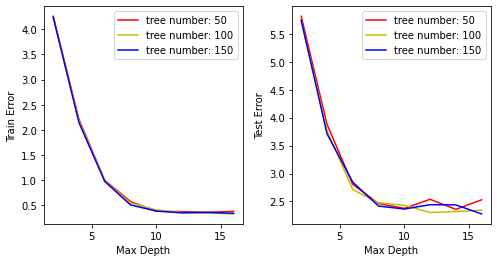

In [32]:
plt.figure(figsize = (8,4))
X = np.linspace(2, 16, 8, dtype=int)
plt.subplot(121)
plt.subplots_adjust(wspace = 0.25)
plt.plot(X, train_error[:,4],'r', label = "tree number: 50")
plt.plot(X, train_error[:,9],'y-', label = "tree number: 100")
plt.plot(X, train_error[:,14],'b-', label = "tree number: 150")
plt.xlabel("Max Depth")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
plt.plot(X, test_error[:,4],'r-', label = "tree number: 50")
plt.plot(X, test_error[:,9],'y-', label = "tree number: 100")
plt.plot(X, test_error[:,14],'b-', label = "tree number: 150")
plt.xlabel("Max Depth")
plt.ylabel("Test Error")
plt.legend()
plt.show()

In [35]:
train_error, test_error = rf_error(tree_num_range=(10,200,20), max_feature_range=(1,10,10))

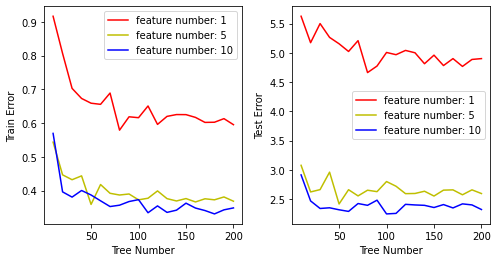

In [36]:
plt.figure(figsize=(8,4))
X = np.linspace(10, 200, 20, dtype=int)
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
plt.plot(X, train_error[:,0],'r-', label="feature number: 1")
plt.plot(X, train_error[:,4],'y', label="feature number: 5")
plt.plot(X, train_error[:,9],'b', label="feature number: 10")
plt.xlabel("Tree Number")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
plt.plot(X, test_error[:,0],'r', label="feature number: 1")
plt.plot(X, test_error[:,4],'y', label="feature number: 5")
plt.plot(X, test_error[:,9],'b', label="feature number: 10")
plt.xlabel("Tree Number")
plt.ylabel("Test Error")
plt.legend()
plt.show()

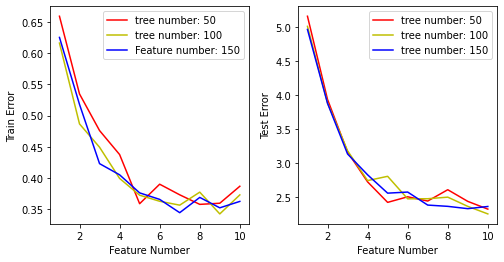

In [37]:
plt.figure(figsize=(8,4))
X = np.linspace(1, 10, 10, dtype=int)
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
plt.plot(X, train_error[4,:],'r', label="tree number: 50")
plt.plot(X, train_error[9,:],'y', label="tree number: 100")
plt.plot(X, train_error[14,:],'b', label="Feature number: 150")
plt.xlabel("Feature Number")
plt.ylabel("Train Error")
plt.legend()

plt.subplot(122)
plt.plot(X, test_error[4,:],'r', label="tree number: 50")
plt.plot(X, test_error[9,:],'y', label="tree number: 100")
plt.plot(X, test_error[14,:],'b', label="tree number: 150")
plt.xlabel("Feature Number")
plt.ylabel("Test Error")
plt.legend()
plt.show()